<a href="https://colab.research.google.com/github/sakshikorpade/Emotion-Recognition-from-Multichannel-EEG-Signals-using-GCNN/blob/main/FHWVG_BHWVG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
import math
import numpy as np
import networkx as nx
from itertools import repeat
from scipy.sparse import csr_matrix

In [ ]:
def plot_histogram(series):
  L=len(series)
  node=np.arange(0,L)
  plt.bar(node, series, width = 0.2,color ='purple')
  plt.yticks(np.arange(0, 10.5, 0.5))
  plt.xlabel("Nodes")
  plt.ylabel("Time Series")
  plt.title("The histogram of time series")
  plt.grid()
  plt.show()

In [ ]:
def hvg(series, timeLine):
    L = len(series)
    starting=[]
    ending=[]
    data_F=[]
    data_B=[]
    for i in range(L-1):
      y1 = series[i]
      t1 = timeLine[i]
      for j in range(i+1,L):
        y2 = series[j]
        t2 = timeLine[j]
        y3 = series[i+1:j]
        t3 = timeLine[i+1:j]
        if all( y3[k] < min(y1,y2) for k in range(len(y3)) ):
             starting.append(i)
             ending.append(j)
             wt_F=abs(round((math.atan((y2-y1)/(j-i)) + math.atan(y1/(j-i))),3))
             data_F.append(wt_F)
             wt_B=abs(round((math.atan((y1-y2)/(j-i)) + math.atan(y2/(j-i))),3))
             data_B.append(wt_B)             
        elif all( yc[k] >= max(ya,yb) for k in range(len(yc)) ): 
            break
    return starting,ending,data_F,data_B

In [ ]:
def print_weighted_matrix(data,starting,ending,type):
  sparseMatrix = csr_matrix((data, (starting, ending)), 
                          shape = (L, L)).toarray()
                          
  if type==0:                       
     print("Forward weighted matrix:\n")  
  else:
    print("Backward weighted matrix:\n") 
                         
  print(sparseMatrix,"\n")
  
  return sparseMatrix

In [ ]:
def network_graph(weighted_matrix, nodes,type):
    rows, cols = np.where(weighted_matrix != 0)
    values_list = []
    row = rows.tolist()
    col = cols.tolist()
    weight_mat = weighted_matrix.tolist()
    for x in range(len(rows)):
      b = row[x]
      c = col[x]
      values_list.append(weight_mat[b][c])
    
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    
    dummy = zip(rows.tolist(), cols.tolist()) 
    zip_iterator = zip(dummy, values_list)
    edgelabels = dict(zip_iterator)
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(15)
    pos = nx.spring_layout(gr)


    nx.draw(gr, pos, edge_color='red', width=0.5, linewidths=1,\
            node_size=10, node_color='black', alpha=0.9)#,\
            #labels={node:node for node in gr.nodes()})
    #nx.draw_networkx_edge_labels(gr,pos,edge_labels=edgelabels,font_color='blue')
    plt.axis('off')
    if type==0:                       
        plt.title("Forward Weighted Horizontal Visibility Graph")
    else:
        plt.title("Backward Weighted Horizontal Visibility Graph")
    plt.show()

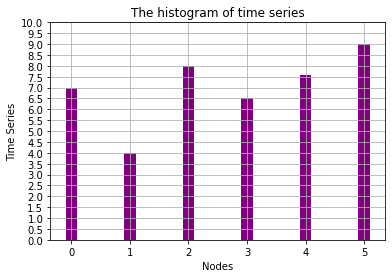

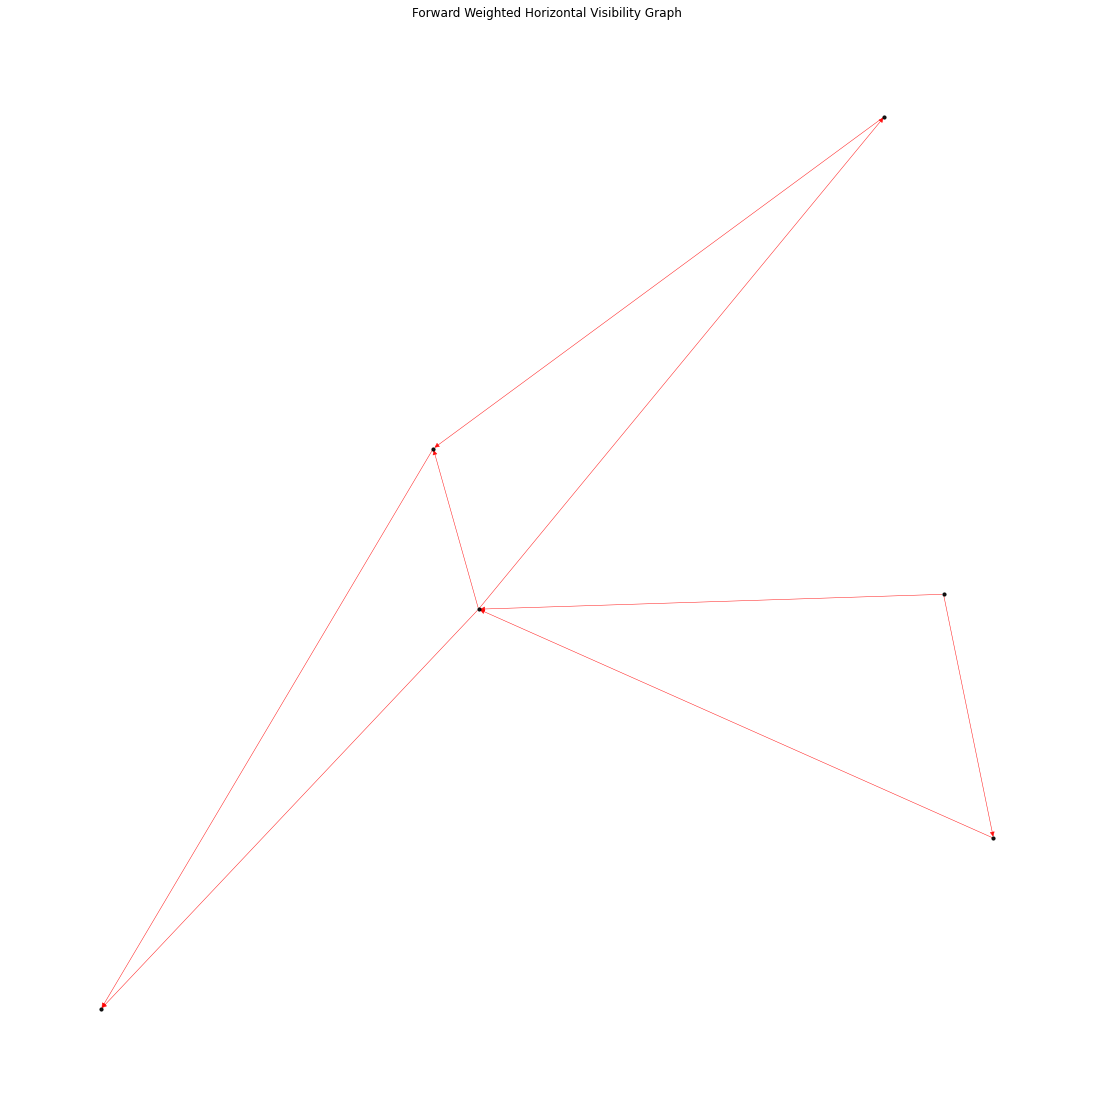

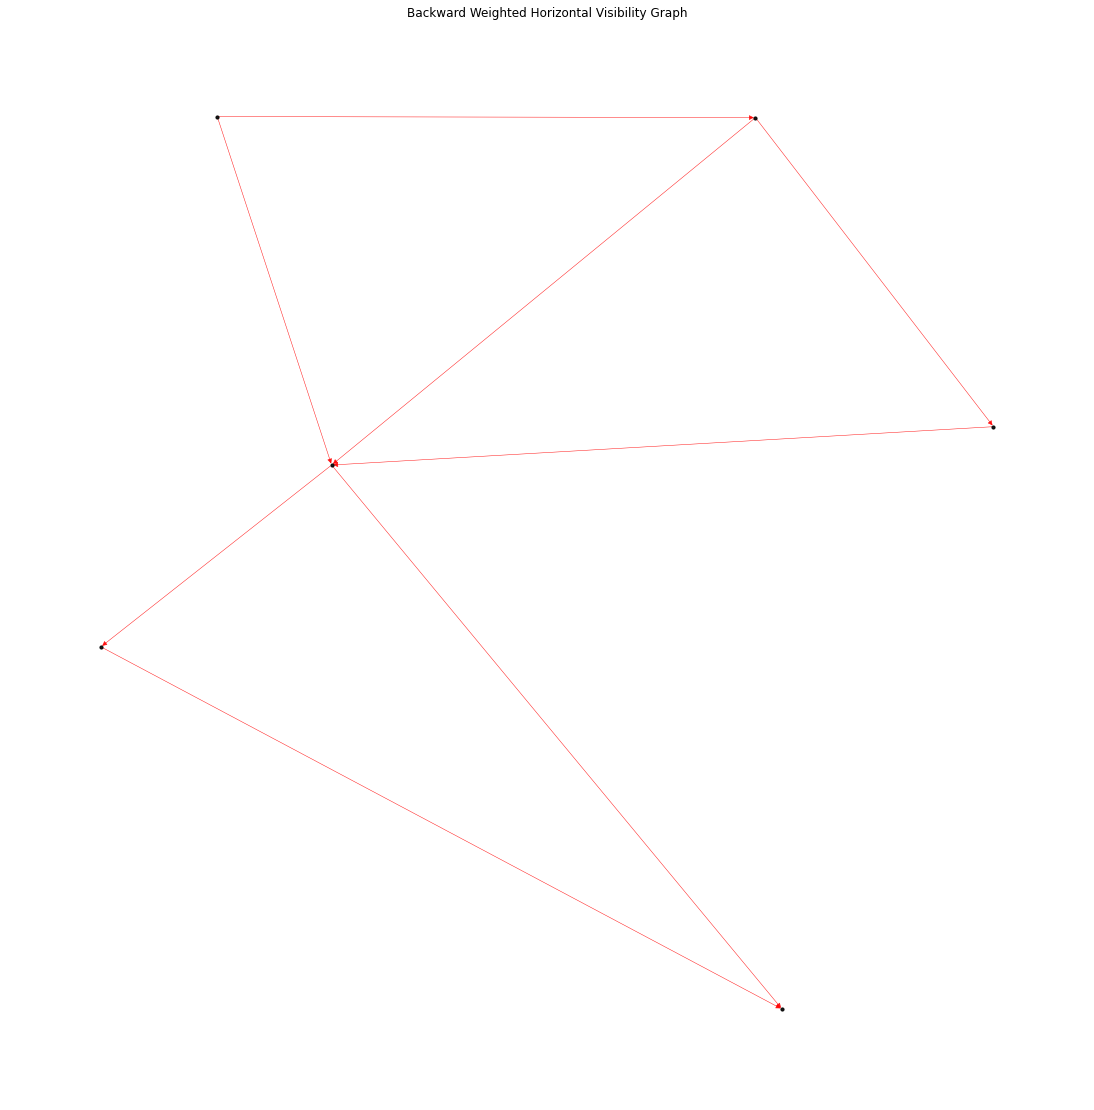

In [ ]:
series = [7.0,4.0,8.0,6.5,7.6,9.0]
L = len(series)
nodes=np.arange(0,L)
timeLine = range(len(series))

plot_histogram(series)

starting=hvg(series, timeLine)[0]
ending=hvg(series, timeLine)[1]
data_F=hvg(series, timeLine)[2]
data_B=hvg(series, timeLine)[3]

Forward_weighted_matrix = print_weighted_matrix(data_F,starting,ending,0)
Backward_weighted_matrix = print_weighted_matrix(data_B,ending,starting,1)
network_graph(Forward_weighted_matrix, nodes,0)
network_graph(Backward_weighted_matrix, nodes,1)

465
465


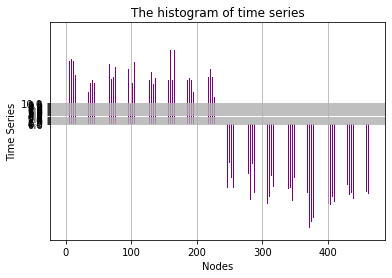

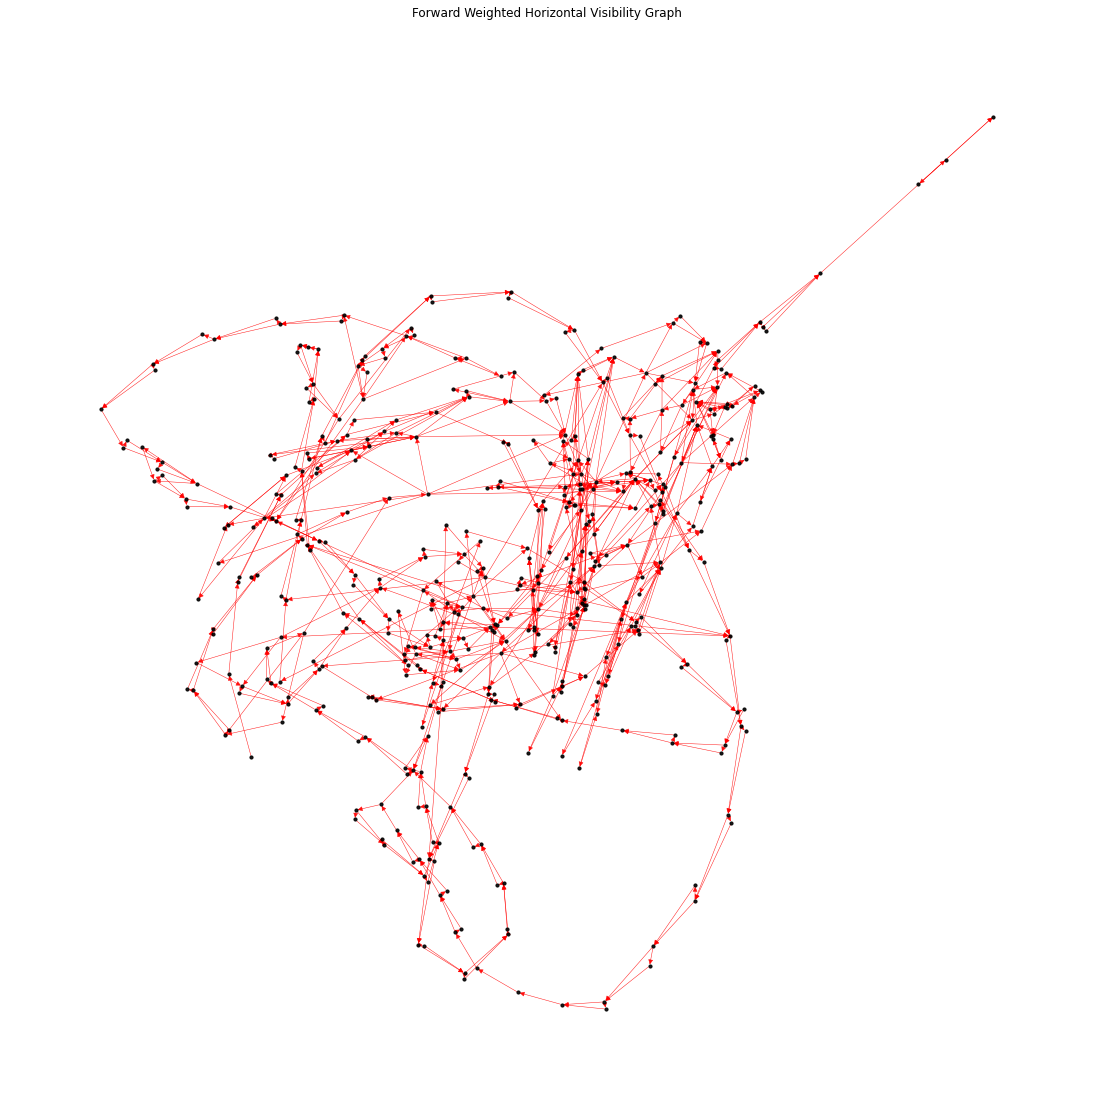

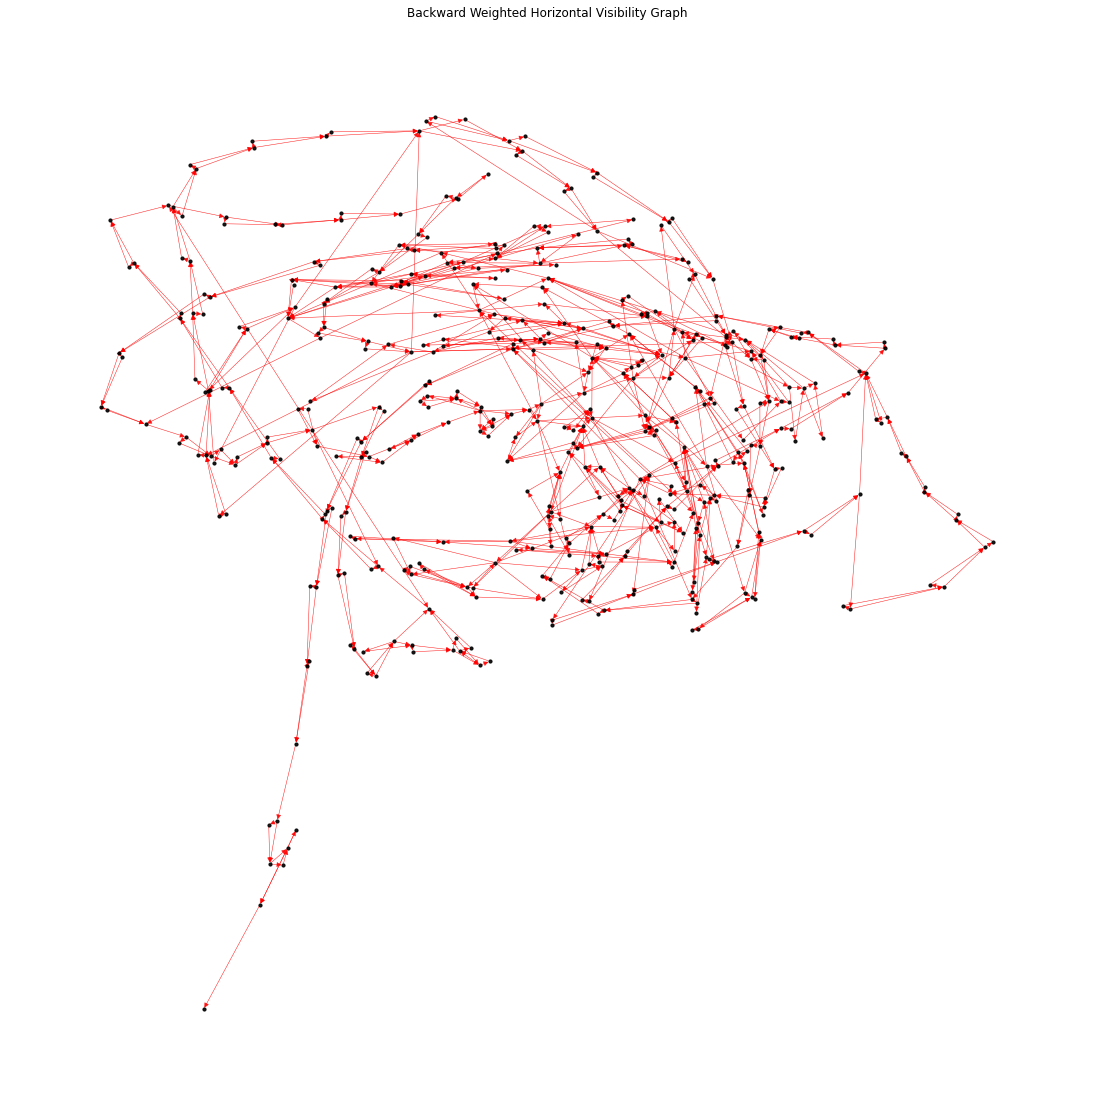

In [ ]:
a_file = open("eeg.txt")

lines = a_file.readlines()[1:]
result = []
result1 = []
for x in lines:
    result.append(x.split('\t')[0])
    result1.append(x.split('\t')[1])
a_file.close()

result = np.array(result)
result = result.astype(float)
result1 = np.array(result1)
result1 = result1.astype(float)

time=[]
channel_1=[]
for i in result:
  if i<=5:
    time.append(i)
  else:
    break
for j in range(len(time)):
  channel_1.append(result1[j])

time=np.array(time)
channel_1=np.array(channel_1)
print(len(time))
print(len(channel_1))

series = channel_1
L = len(series)
nodes=np.arange(0,L)
timeLine = range(len(series))

plot_histogram(series)

starting=hvg(series, timeLine)[0]
ending=hvg(series, timeLine)[1]
data_F=hvg(series, timeLine)[2]
data_B=hvg(series, timeLine)[3]

Forward_weighted_matrix = print_weighted_matrix(data_F,starting,ending,0)
Backward_weighted_matrix = print_weighted_matrix(data_B,ending,starting,1)
network_graph(Forward_weighted_matrix, nodes,0)
network_graph(Backward_weighted_matrix, nodes,1)
